In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/
# https://www.youtube.com/watch?v=CbTU92pbDKw 
import numpy as np
import pandas as pd
df = pd.read_csv('../data/MSFT.csv')

df
print (df,'----aaa')
# df.columns

            Date        Open        High         Low       Close   Adj Close  \
0     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062553   
1     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063632   
2     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.062014   
3     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060936   
4     1986-03-20    0.098090    0.098090    0.094618    0.095486    0.059318   
...          ...         ...         ...         ...         ...         ...   
9468  2023-10-09  324.750000  330.299988  323.179993  329.820007  329.820007   
9469  2023-10-10  330.959991  331.100006  327.670013  328.390015  328.390015   
9470  2023-10-11  331.209991  332.820007  329.140015  332.420013  332.420013   
9471  2023-10-12  330.570007  333.630005  328.720001  331.160004  331.160004   
9472  2023-10-13  332.380005  333.829987  326.359985  327.730011  327.730011   

         Volume  
0     308160000  
1  

In [2]:
# df = df[['Date', 'Close']]

# df

In [3]:
df['Date']

0       1986-03-14
1       1986-03-17
2       1986-03-18
3       1986-03-19
4       1986-03-20
           ...    
9468    2023-10-09
9469    2023-10-10
9470    2023-10-11
9471    2023-10-12
9472    2023-10-13
Name: Date, Length: 9473, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
# appling a function to the Data column
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-14
1      1986-03-17
2      1986-03-18
3      1986-03-19
4      1986-03-20
          ...    
9468   2023-10-09
9469   2023-10-10
9470   2023-10-11
9471   2023-10-12
9472   2023-10-13
Name: Date, Length: 9473, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059318,58435200
...,...,...,...,...,...,...
2023-10-09,324.750000,330.299988,323.179993,329.820007,329.820007,19891200
2023-10-10,330.959991,331.100006,327.670013,328.390015,328.390015,20557100
2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200


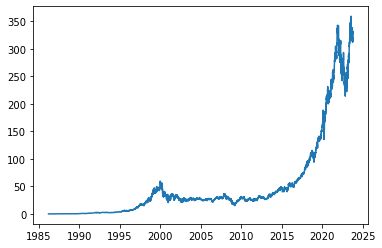

In [7]:
import matplotlib.pyplot as plt
# print (list(df.index))
# print (df.columns)
# print (df.index[0:1000])
# print (list(df['Close']))
# print (np.ndim(df.index))
plt.plot(list(df.index), list(df['Close']))
# # df1=df.reset_index()['Close']
plt.show()

# plt.plot(df1)

In [14]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-26', 
                                '2022-03-23', 
                                n=4)
windowed_df


,Target Date,Target-4,Target-3,Target-2,Target-1,Target
0,2021-03-26,235.990005,237.580002,235.460007,232.339996,236.479996
1,2021-03-29,237.580002,235.460007,232.339996,236.479996,235.240005
2,2021-03-30,235.460007,232.339996,236.479996,235.240005,231.850006
3,2021-03-31,232.339996,236.479996,235.240005,231.850006,235.770004
4,2021-04-01,236.479996,235.240005,231.850006,235.770004,242.350006
...,...,...,...,...,...,...
246,2022-03-17,280.070007,276.440002,287.149994,294.390015,295.220001
247,2022-03-18,276.440002,287.149994,294.390015,295.220001,300.429993
248,2022-03-21,287.149994,294.390015,295.220001,300.429993,299.160004
249,2022-03-22,294.390015,295.220001,300.429993,299.160004,304.059998


In [15]:
df['2021-03-25':'2022-03-23']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,235.300003,236.940002,231.570007,232.339996,227.244888,34061900
2021-03-26,231.550003,236.710007,231.550003,236.479996,231.294083,25479900
2021-03-29,236.589996,236.800003,231.880005,235.240005,230.081299,25227500
2021-03-30,233.529999,233.850006,231.100006,231.850006,226.765640,24792000
2021-03-31,232.910004,239.100006,232.389999,235.770004,230.599686,43623500
...,...,...,...,...,...,...
2022-03-17,293.290009,295.609985,289.369995,295.220001,291.097931,30816600
2022-03-18,295.369995,301.000000,292.730011,300.429993,296.235138,43390600
2022-03-21,298.890015,300.140015,294.899994,299.160004,294.982910,28351200


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((251,), (251, 4, 1), (251,))

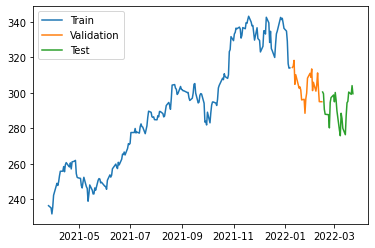

In [17]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 162ms/step - loss: 84741.3984 - mean_absolute_error: 289.3842 - val_loss: 92279.0000 - val_mean_absolute_error: 303.6874
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 84503.6719 - mean_absolute_error: 288.9721 - val_loss: 92015.4062 - val_mean_absolute_error: 303.2531
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 84211.4688 - mean_absolute_error: 288.4650 - val_loss: 91619.9297 - val_mean_absolute_error: 302.6003
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 83790.8281 - mean_absolute_error: 287.7329 - val_loss: 91091.8516 - val_mean_absolute_error: 301.7265
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 83216.4219 - mean_absolute_error: 286.7313 - val_loss: 90352.6172 - val_mean_absolute_error: 300.4990
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 82439.0938 - mean_absolute_error: 285.3736 - val_loss: 89

Epoch 49/100
7/7 [==============================] - 0s 26ms/step - loss: 907.7665 - mean_absolute_error: 25.3953 - val_loss: 310.7533 - val_mean_absolute_error: 16.2092
Epoch 50/100
7/7 [==============================] - 0s 21ms/step - loss: 864.7541 - mean_absolute_error: 24.8451 - val_loss: 255.5479 - val_mean_absolute_error: 14.4565
Epoch 51/100
7/7 [==============================] - 0s 22ms/step - loss: 801.8093 - mean_absolute_error: 23.9284 - val_loss: 235.9761 - val_mean_absolute_error: 13.8398
Epoch 52/100
7/7 [==============================] - 0s 22ms/step - loss: 766.8735 - mean_absolute_error: 23.4181 - val_loss: 394.1995 - val_mean_absolute_error: 18.6947
Epoch 53/100
7/7 [==============================] - 0s 17ms/step - loss: 743.7419 - mean_absolute_error: 22.7385 - val_loss: 336.0237 - val_mean_absolute_error: 17.0988
Epoch 54/100
7/7 [==============================] - 0s 32ms/step - loss: 689.7316 - mean_absolute_error: 22.0429 - val_loss: 188.4751 - val_mean_absolute_e

7/7 [==============================] - 0s 80ms/step - loss: 18.3190 - mean_absolute_error: 3.3815 - val_loss: 37.1146 - val_mean_absolute_error: 5.0756
Epoch 99/100
7/7 [==============================] - 0s 26ms/step - loss: 21.9565 - mean_absolute_error: 3.7341 - val_loss: 36.7364 - val_mean_absolute_error: 5.0529
Epoch 100/100
7/7 [==============================] - 0s 18ms/step - loss: 19.8727 - mean_absolute_error: 3.4757 - val_loss: 41.9414 - val_mean_absolute_error: 5.3128


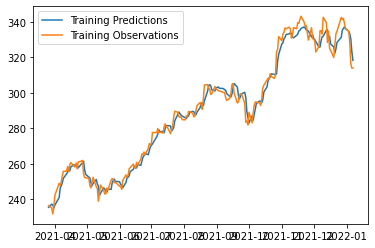

In [23]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

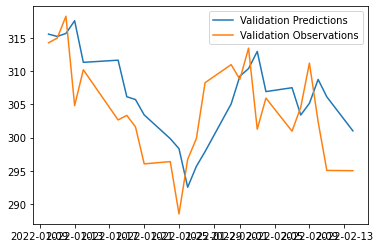

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

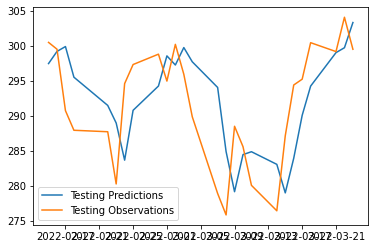

In [25]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

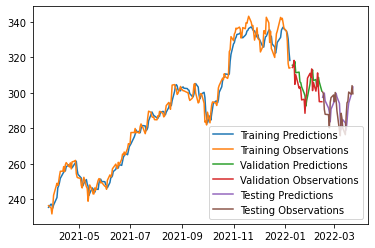

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction